<a href="https://colab.research.google.com/github/volinhbao/CS114.K21.KHTN/blob/master/Capstone%20Project/Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Movie Reviews Analysis**

---



# Description:
- This is a classification problem. In this problem, we will detect a review is whether **positive** or **negative**. Since then, we can give advice to the user that whether they should watch that film.

# Dataset
This dataset consists of 6285 reviews from IMDB. Those which has 9 or 10 rating will be labelled **positive**, whereas those which has 4 rating and below will be labelled **negative**.

This dataset is **balanced** between the positive reviews (3125 reviews) and negative reviews (3144 reviews).

In [ ]:
import pandas as pd


In [ ]:
!git clone https://github.com/volinhbao/CS114.K21.KHTN.git

fatal: destination path 'CS114.K21.KHTN' already exists and is not an empty directory.


In [ ]:
dataset = pd.read_csv('/content/CS114.K21.KHTN/Capstone Project/imdb-reviews-dataset_final.csv',header = 0)
dataset.head()

,movie,title,review,isPos
0,Joker,As a viewer that actually went to TIFF and wit...,I was a person that saw all the hype and claim...,0
1,Joker,Outstanding movie with a haunting performance ...,"Every once in a while a movie comes, that trul...",0
2,Joker,Only certain people can relate,This is a movie that only those who have felt ...,0
3,Joker,Perfect in every aspect.,"Truly a masterpiece, The Best Hollywood film o...",0
4,Joker,MASTERPIECE 😍,Joaquin Phoenix gives a tour de force performa...,0


In [ ]:
dataset

,movie,title,review,isPos
0,Joker,As a viewer that actually went to TIFF and wit...,I was a person that saw all the hype and claim...,0
1,Joker,Outstanding movie with a haunting performance ...,"Every once in a while a movie comes, that trul...",0
2,Joker,Only certain people can relate,This is a movie that only those who have felt ...,0
3,Joker,Perfect in every aspect.,"Truly a masterpiece, The Best Hollywood film o...",0
4,Joker,MASTERPIECE 😍,Joaquin Phoenix gives a tour de force performa...,0
...,...,...,...,...
6280,Thor: Ragnarok,Bad casting welcome back cheesy movies,This is like the old Batman movies with Jim Ca...,1
6281,Thor: Ragnarok,Surreal,The Good: Visually I loved pretty much everyth...,1
6282,Thor: Ragnarok,Identitiy Politics barf,"Yeah, it started a few years before, but this ...",1
6283,Thor: Ragnarok,MCU doesn't suck but this movie SUCKS (get it),I may be late to review this movie but better ...,1


In [ ]:
dataset = dataset.drop(dataset[dataset.isPos =='isPos'].index)

Dataset is not skewed


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


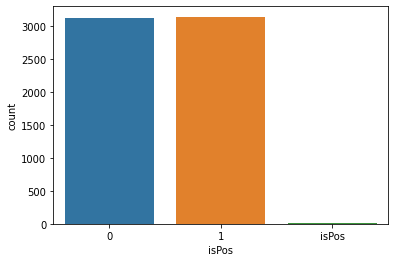

In [ ]:
import seaborn as sns

sns.countplot(dataset.isPos)

In [ ]:
dataset.isna().sum()

movie     0
title     0
review    0
isPos     0
dtype: int64

In [ ]:
dataset.shape

(6285, 4)

In [ ]:
dataset.isPos.value_counts()

1        3144
0        3125
isPos      16
Name: isPos, dtype: int64

#**Preprocessing**



In [ ]:
dataset = dataset.rename(columns = {'Movie':'movie','Title':'title','Review':'review'})
dataset

,movie,title,review,isPos
0,Joker,As a viewer that actually went to TIFF and wit...,I was a person that saw all the hype and claim...,0
1,Joker,Outstanding movie with a haunting performance ...,"Every once in a while a movie comes, that trul...",0
2,Joker,Only certain people can relate,This is a movie that only those who have felt ...,0
3,Joker,Perfect in every aspect.,"Truly a masterpiece, The Best Hollywood film o...",0
4,Joker,MASTERPIECE 😍,Joaquin Phoenix gives a tour de force performa...,0
...,...,...,...,...
6280,Thor: Ragnarok,Bad casting welcome back cheesy movies,This is like the old Batman movies with Jim Ca...,1
6281,Thor: Ragnarok,Surreal,The Good: Visually I loved pretty much everyth...,1
6282,Thor: Ragnarok,Identitiy Politics barf,"Yeah, it started a few years before, but this ...",1
6283,Thor: Ragnarok,MCU doesn't suck but this movie SUCKS (get it),I may be late to review this movie but better ...,1


In [ ]:
dataset.to_csv('/content/imdb-reviews-dataset.csv',index=False)

### Let's take a look at a arbitrary review


In [ ]:
dataset.review.loc[1]

"Every once in a while a movie comes, that truly makes an impact. Joaquin's performance and scenography in all it's brilliance. Grotesque, haunting and cringy. Hard to watch at times,... but so mesmerizing, you won't blink an eye watching it. Tragic, but with seriously funny moments. Emotional rollercoaster - sometimes, with multiple emotions popping-up at the same time.this is far from a typical action-riddled predictable super-hero movie - it's a proper psychological thriller/drama, with the single best character development I have ever seen.3,602 out of 4,398 found this helpful.Was this review helpful?Sign into vote.Permalink"

Because HTML tags were removed in the crawling step, so we'll skip that step and come to remove all other character that's NOT alphabet using Regular Expression

In [ ]:
import re, string
import nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

stop_words = set(stopwords.words('english'))
lem = WordNetLemmatizer()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
dataset

,movie,title,review,isPos
0,Joker,As a viewer that actually went to TIFF and wit...,I was a person that saw all the hype and claim...,0
1,Joker,Outstanding movie with a haunting performance ...,"Every once in a while a movie comes, that trul...",0
2,Joker,Only certain people can relate,This is a movie that only those who have felt ...,0
3,Joker,Perfect in every aspect.,"Truly a masterpiece, The Best Hollywood film o...",0
4,Joker,MASTERPIECE 😍,Joaquin Phoenix gives a tour de force performa...,0
...,...,...,...,...
6280,Thor: Ragnarok,Bad casting welcome back cheesy movies,This is like the old Batman movies with Jim Ca...,1
6281,Thor: Ragnarok,Surreal,The Good: Visually I loved pretty much everyth...,1
6282,Thor: Ragnarok,Identitiy Politics barf,"Yeah, it started a few years before, but this ...",1
6283,Thor: Ragnarok,MCU doesn't suck but this movie SUCKS (get it),I may be late to review this movie but better ...,1


In [ ]:
def remove_char(s):
  s= ''.join(map(lambda c: '' if c in '0123456789' else c, s))
  s = re.sub('\s+',' ',s)
  s= s.replace('out of found this helpful Was this review helpful Sign into vote Permalink','')
  return s

In [ ]:
def preprocess(review):
    # Remove all characters NOT alphabet
    review = re.sub('[^a-zA-Z]', ' ', review)

    # Remove 'permalink'
    # review = re.sub('Permalink','',review)
    review = review.translate(str.maketrans('', '', string.punctuation))
    review = remove_char(review)
    
    # Lowercase the review
    review = review.lower()

    # Split the review into words using Word Tokenizer
    review = word_tokenize(review)
    #print('Tokenize: ',review)
    # Remove stopwords
    review = [word for word in review if not word in stop_words]
    #print(review)
    # Lemmatizing the tokens
    review = [lem.lemmatize(word) for word in review]
    #print('Lemma: ', review)
    # Merge the tokens back to a full review
    review = ' '.join(review)
    #print(review)
    return review

# **Feature Extraction**

To vectorize the reviews, I use 2 methods:
- **Count Vectorizer**
- **TF-IDF Vectorizer**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# **Training the model**

Before apply models to train the data, let's split the whole dataset into train dataset and test dataset

In [ ]:
from sklearn.model_selection import train_test_split

dataset_train, dataset_test, train_data_label, test_data_label = train_test_split(dataset['review'], dataset['isPos'], test_size=0.2, random_state=12)

In [ ]:
dataset_train[1]

"Every once in a while a movie comes, that truly makes an impact. Joaquin's performance and scenography in all it's brilliance. Grotesque, haunting and cringy. Hard to watch at times,... but so mesmerizing, you won't blink an eye watching it. Tragic, but with seriously funny moments. Emotional rollercoaster - sometimes, with multiple emotions popping-up at the same time.this is far from a typical action-riddled predictable super-hero movie - it's a proper psychological thriller/drama, with the single best character development I have ever seen.3,602 out of 4,398 found this helpful.Was this review helpful?Sign into vote.Permalink"

##Build train and test corpus

In [ ]:
corpus_train = []
corpus_test = []

corpus_train = [preprocess(review) for review in dataset_train]
corpus_test = [preprocess(review) for review in dataset_test]

In [ ]:
corpus_train[-1]

'watched movie hoping improvement last disaster spider movie say certainty far worst whole spiderman movie coming age teenage crush movie spiderman thrown waste time effort movie studio bad predictable story really much thought gone seems hollywood pump film little thought predictable character story waste time pointless movie'

In [ ]:
corpus_test[-1]

'listen anyone say movie mastepiece even hour watched movie still get chill moment film film excellent job potraying arthur life demise leading become joker really comic book movie crime movie certain element batman lore tie good unexpected way film yes violence disturbing scene r rated film joker movie would failure everyone reading watch joker even hour seeing feel shiver spine guarantee'

## **Machine Learning Algorithms**

1. Logistic Regression
2. SVM
3. Naive Bayes


In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

In [ ]:
# Let's vectorize the reviews first, using TF-IDF
tfidf_vec = TfidfVectorizer()
#tfidf_vec = TfidfVectorizer(ngram_range=(1, 3))
tfidf_vec_train = tfidf_vec.fit_transform(corpus_train)
tfidf_vec_test = tfidf_vec.transform(corpus_test)


### **Logistic Regression**

In [ ]:
# Logisic Regression
model_LR = LogisticRegression()
model_LR.fit(tfidf_vec_train, train_data_label)

print("Train score: ",model_LR.score(tfidf_vec_train, train_data_label))
print("Test score: ",model_LR.score(tfidf_vec_test, test_data_label))

Train score:  0.9643070787637089
Test score:  0.9354066985645934


In [ ]:
predict = model_LR.predict(tfidf_vec_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("Classification Report: \n", classification_report(test_data_label, predict,target_names=['Positive','Negative']))
print("Confusion Matrix: \n", confusion_matrix(test_data_label, predict))
print("Accuracy: \n", accuracy_score(test_data_label, predict))

Classification Report: 
               precision    recall  f1-score   support

    Positive       0.92      0.95      0.93       602
    Negative       0.95      0.93      0.94       652

    accuracy                           0.94      1254
   macro avg       0.94      0.94      0.94      1254
weighted avg       0.94      0.94      0.94      1254

Confusion Matrix: 
 [[569  33]
 [ 48 604]]
Accuracy: 
 0.9354066985645934


We try to vectorize using CountVectorizer and fit on LR model

In [ ]:
count_vec = CountVectorizer(ngram_range=(1, 3), binary=False)
count_vec_train = count_vec.fit_transform(corpus_train)
count_vec_test = count_vec.transform(corpus_test)

In [ ]:
# Logisic Regression (with CountVectorizer)
model_LR_count = LogisticRegression()
model_LR_count.fit(count_vec_train, train_data_label)

print("Train score: ",model_LR_count.score(count_vec_train, train_data_label))
print("Test score: ",model_LR_count.score(count_vec_test, test_data_label))

Train score:  1.0
Test score:  0.9242424242424242


In [ ]:
predict_cv = model_LR_count.predict(count_vec_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("Classification Report: \n", classification_report(test_data_label, predict_cv,target_names=['Positive','Negative']))
print("Confusion Matrix: \n", confusion_matrix(test_data_label, predict_cv))
print("Accuracy: \n", accuracy_score(test_data_label, predict_cv))

Classification Report: 
               precision    recall  f1-score   support

    Positive       0.90      0.94      0.92       602
    Negative       0.94      0.91      0.93       652

    accuracy                           0.92      1254
   macro avg       0.92      0.92      0.92      1254
weighted avg       0.93      0.92      0.92      1254

Confusion Matrix: 
 [[567  35]
 [ 60 592]]
Accuracy: 
 0.9242424242424242


###**SVM Classifier**

In [ ]:
from sklearn.svm import SVC

svc = SVC(random_state=12)
svc.fit(tfidf_vec_train, train_data_label)

predict = svc.predict(tfidf_vec_test)

In [ ]:
print("Classification Report: \n", classification_report(test_data_label, predict,target_names=['Positive','Negative']))
print("Confusion Matrix: \n", confusion_matrix(test_data_label, predict))
print("Accuracy: \n", accuracy_score(test_data_label, predict))

Classification Report: 
               precision    recall  f1-score   support

    Positive       0.92      0.96      0.94       602
    Negative       0.96      0.92      0.94       652

    accuracy                           0.94      1254
   macro avg       0.94      0.94      0.94      1254
weighted avg       0.94      0.94      0.94      1254

Confusion Matrix: 
 [[575  27]
 [ 49 603]]
Accuracy: 
 0.9393939393939394


Let's apply CountVectorizer and fit on this model

In [ ]:
svc_count = SVC(random_state=12)
svc_count.fit(tfidf_vec_train, train_data_label)

predict_count = svc_count.predict(tfidf_vec_test)

In [ ]:
print("Classification Report: \n", classification_report(test_data_label, predict_count,target_names=['Positive','Negative']))
print("Confusion Matrix: \n", confusion_matrix(test_data_label, predict_count))
print("Accuracy: \n", accuracy_score(test_data_label, predict_count))

Classification Report: 
               precision    recall  f1-score   support

    Positive       0.92      0.96      0.94       602
    Negative       0.96      0.92      0.94       652

    accuracy                           0.94      1254
   macro avg       0.94      0.94      0.94      1254
weighted avg       0.94      0.94      0.94      1254

Confusion Matrix: 
 [[575  27]
 [ 49 603]]
Accuracy: 
 0.9393939393939394


###**Naive Bayes**

In [ ]:
from sklearn.naive_bayes import MultinomialNB

Apply TF-IDF and fit on this model

In [ ]:
tfidf_vec_NB = TfidfVectorizer(ngram_range=(1, 1))
tfidf_vec_train_NB = tfidf_vec_NB.fit_transform(corpus_train)
tfidf_vec_test_NB = tfidf_vec_NB.transform(corpus_test)

In [ ]:
multi_clf = MultinomialNB()
multi_clf.fit(tfidf_vec_train_NB, train_data_label)

predict_NB = multi_clf.predict(tfidf_vec_test_NB)

In [ ]:
print("Classification Report: \n", classification_report(test_data_label, predict_NB,target_names=['Positive','Negative']))
print("Confusion Matrix: \n", confusion_matrix(test_data_label, predict_NB))
print("Accuracy: \n", accuracy_score(test_data_label, predict_NB))

Classification Report: 
               precision    recall  f1-score   support

    Positive       0.89      0.97      0.92       602
    Negative       0.97      0.88      0.92       652

    accuracy                           0.92      1254
   macro avg       0.93      0.93      0.92      1254
weighted avg       0.93      0.92      0.92      1254

Confusion Matrix: 
 [[582  20]
 [ 75 577]]
Accuracy: 
 0.9242424242424242


**We try CountVectorizer before fit on this model**

In [ ]:
count_vec_NB = CountVectorizer(ngram_range=(1, 3), binary=False)
count_vec_train_NB = count_vec_NB.fit_transform(corpus_train)
count_vec_test_NB = count_vec_NB.transform(corpus_test)

In [ ]:
multi_clf_count = MultinomialNB()
multi_clf_count.fit(count_vec_train_NB, train_data_label)

predict_NB_count = multi_clf_count.predict(count_vec_test_NB)

In [ ]:
print("Classification Report: \n", classification_report(test_data_label, predict_NB_count,target_names=['Positive','Negative']))
print("Confusion Matrix: \n", confusion_matrix(test_data_label, predict_NB_count))
print("Accuracy: \n", accuracy_score(test_data_label, predict_NB_count))

Classification Report: 
               precision    recall  f1-score   support

    Positive       0.90      0.97      0.93       602
    Negative       0.97      0.90      0.93       652

    accuracy                           0.93      1254
   macro avg       0.93      0.93      0.93      1254
weighted avg       0.93      0.93      0.93      1254

Confusion Matrix: 
 [[582  20]
 [ 67 585]]
Accuracy: 
 0.930622009569378


# Model Testing by User

In [ ]:
rev = str(input("Enter a review: "))

Enter a review: This is too bad, although the soundtrack is epic. The plot is so boring. During the film I'm only get excited by the main female character.


In [ ]:
print(rev)

This is too bad, although the soundtrack is epic. The plot is so boring. During the film I'm only get excited by the main female character.


In [ ]:
rev_train = preprocess(rev)

In [ ]:
rev_train

'bad although soundtrack epic plot boring film get excited main female character'

**I will try to apply both CountVectorizer and TF-IDF to this review**

In [ ]:
rev_tf = tfidf_vec.transform([rev_train]).toarray()

In [ ]:
y_pred = model_LR.predict(rev_tf)

In [ ]:
if y_pred == 0:
  print("Positive")
if y_pred == 1:
  print("Negative")

In [ ]:
def test_by_user():
  rev = str(input("Enter a review: "))
  print(rev)
  rev_train = preprocess(rev)
  rev_tf = tfidf_vec.transform([rev_train]).toarray()
  y_pred = int(model_LR.predict(rev_tf))
  
  if y_pred == 0:
    print("Positive")
  if y_pred == 1:
    print("Negative")

In [ ]:
test_by_user()

Enter a review:  When a torpedo careens right off the side of the Keeling at one point, the action beat stands out from the shapeless cacophony of screams and explosions that "Greyhound" substitutes in lieu of coherent naval warfare.
 When a torpedo careens right off the side of the Keeling at one point, the action beat stands out from the shapeless cacophony of screams and explosions that "Greyhound" substitutes in lieu of coherent naval warfare.
Negative


# **Conclusion**
- 3 algorithm give results of from **92-93 percent** of prediction
- The reason may be due to the size of the dataset(~6k reviews), compared to a 60k IMDB reviews on Kaggle (https://www.kaggle.com/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews?select=IMDB+Dataset.csv). The result on Kaggle on the 60k IMDB reviews dataset are **87-89 percent** of prediction(https://www.kaggle.com/subhamoybhaduri/approaches-of-nlp-and-sentiment-classification)
- It is also because this is only a **binary classification**
# **Future work**
- Enlarge the dataset
- Work with 3 label(positive, negative, neutral) or more (very interesting, interesting, neutral, boring, don't care)